## 0. 패키지 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import dlib
import time
import tensorflow as tf

## 1. 이미지 불러오기

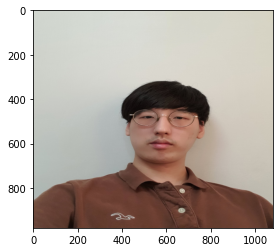

In [43]:
image = cv2.imread("./Data/tmp.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (1080, 980))
cp_image = image.copy()
plt.imshow(cp_image)
plt.show()

실습에 사용할 기본 이미지를 불러와서 (1080, 980) 사이즈로 바꿔줍니다.  
각종 기법을 시범 적용하는 용도로 원본 이미지에서 복사 이미지를 복사하여 만들어 줍니다.

## 2. HOG 활용 얼굴 탐지

rectangles[[(439, 405) (749, 714)]]


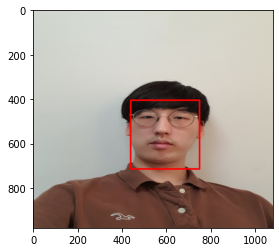

걸린 시간 : 약 0.8157초


In [44]:
start = time.time()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(cp_image)
print(dlib_rects ) # [(left, top), (right, down)]

left = dlib_rects[0].left()
top = dlib_rects[0].top()
right = dlib_rects[0].right()
bottom = dlib_rects[0].bottom()

cv2.rectangle(cp_image, (left, top), (right, bottom), (255,0,0), 5,
              lineType = cv2.LINE_AA)
plt.imshow(cp_image)
plt.show()

end = time.time()

print(f"걸린 시간 : 약 {round(end - start, 5)}초")

In [31]:
rect_width = dlib_rects[0].width()
rect_height = dlib_rects[0].height()
print(f"가로 : {rect_width}\n세로 : {rect_height}")

가로 : 311
세로 : 310


```dlib.get_frontal_face_detector()```함수를 사용하여 정면 얼굴의 위치 x,y 좌표를 반환하고 반환된 위치에 사각형을 그려서 얼굴 부분을 구분해줍니다.

## 3. landmark 탐지

In [32]:
model_path = "./Model/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

landmark detection의 경우 사전에 학습되어진 모델을 사용하기 위해서 파일 형태의 모델을 불러옵니다.

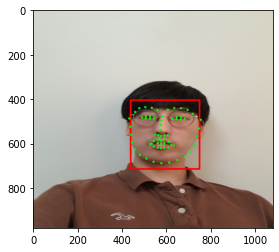

걸린 시간 : 약 0.25115초


In [45]:
start = time.time()

points = landmark_predictor(cp_image, dlib_rects[0])
list_points = list(map(lambda p : (p.x, p.y), points.parts()))

for point in list_points:
    cv2.circle(cp_image, point, 5, (0,255,0), -1) # -1은 도형의 채우기 여부
plt.imshow(cp_image)
plt.show()

end = time.time()

print(f"걸린 시간 : 약 {round(end - start, 5)}초")

학습된 landmark 모델을 불러와서 현재 이미지의 68개의 landmark 위치들을 반환하고 각 landmark의 위치에 원을 그려서 표시를 해줍니다.

## 4. 스티커 붙히기

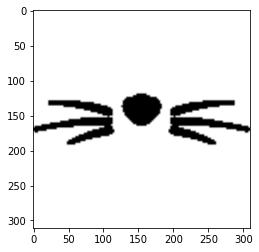

In [7]:
meow = cv2.imread("./Data/cat_whiskers.png")
meow = cv2.resize(meow, (rect_height, rect_width)) # (세로, 가로)
plt.imshow(meow)

스티커로 붙일 이미지의 크기는 얼굴 탐지로 찾은 사각형의 크기와 동일한 크기로 resizing을 해줍니다.  
resizing된 스티커의 크기는 (311, 310) 입니다.

![image](https://user-images.githubusercontent.com/51338268/136186765-89f97bda-a595-4f1d-8dac-0a4f06204d3a.png)


In [8]:
point_x, point_y = top, left
# point_x, point_y = list_points[33]
print(list_points[51])

(576, 587)


기본 이미지에서 스티커를 붙일 위치를 새로 지정합니다.  
스티커의 시작점을 얼굴 탐지로 찾은 사각형의 top, left의 위치를 그대로 넘겨줍니다.

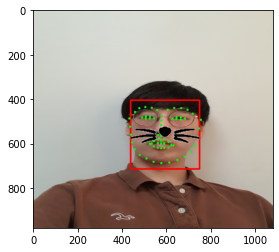

In [9]:
ccp_image = cp_image.copy()
area = ccp_image[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]]
# np.where(condtion, True, False)
ccp_image[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]] = np.where(meow==255, area, meow)
plt.imshow(ccp_image)
plt.show()

위치를 조정한 스티커의 위치를 확인합니다.

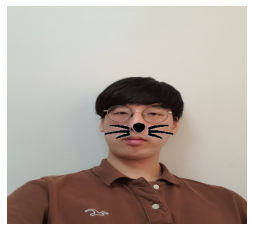

In [10]:
sticker_image = image.copy()
area = sticker_image[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]]
# np.where(condtion, True, False)
sticker_image[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]] = np.where(meow==255, area, meow)
plt.imshow(sticker_image)
plt.axis("off")
plt.show()

각종 얼굴 위치를 표시한 사각형과 landmark가 있는 복사 이미지가 아닌 원본 이미지에 스티커를 적용하여 스티커앱을 완성합니다.

## 5. 문제점 찾아보기

- 얼굴 각도에 따라 제대로 탐지를 할까?
- 멀리서 촬영해도 될까?

### 얼굴 각도에 따라 제대로 탐지를 할까?

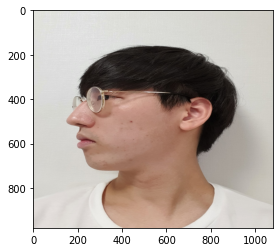

In [46]:
side = cv2.imread("./Data/side_face.jpg")
side = cv2.cvtColor(side, cv2.COLOR_BGR2RGB)
side = cv2.resize(side, (1080, 980))
cp_side = side.copy()
plt.imshow(cp_side)
plt.show()

얼굴 각도에 따라서 HOG가 얼굴을 제대로 탐지를 할 수 있는지 실험해보겠습니다.

#### HOG 활용 얼굴 탐지

In [35]:
start = time.time()
try:
    dlib_rects = detector_hog(cp_side)
    left = dlib_rects[0].left()
    top = dlib_rects[0].top()
    right = dlib_rects[0].right()
    bottom = dlib_rects[0].bottom()

    cv2.rectangle(cp_side, (left, top), (right, bottom), (255,0,0), 5,
                  lineType = cv2.LINE_AA)
    plt.imshow(cp_side)
    plt.show()
except IndexError:
    print("발견된 얼굴이 없습니다.")
end = time.time()

print(f"걸린 시간 : 약 {round(end - start, 5)}초")

발견된 얼굴이 없습니다.
걸린 시간 : 약 0.20112초


기존의 얼굴 탐지 기법인 HOG를 사용하면 얼굴을 탐지하지 못하는 현상이 발생합니다.

#### CNN 활용 얼굴 탐지

참고사이트
- https://towardsdatascience.com/cnn-based-face-detector-from-dlib-c3696195e01c

In [36]:
detector_cnn = dlib.cnn_face_detection_model_v1("./Model/mmod_human_face_detector.dat")

dllib 패키지에서 제공하는 사전에 가중치가 학습된 CNN 모델을 불러옵니다.

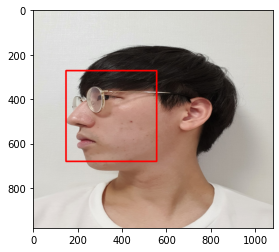

걸린 시간 : 약 15.80875초


In [47]:
start = time.time()
try:
    dlib_rects = detector_cnn(cp_side)
    left = dlib_rects[0].rect.left()
    top = dlib_rects[0].rect.top()
    right = dlib_rects[0].rect.right()
    bottom = dlib_rects[0].rect.bottom()

    cv2.rectangle(cp_side, (left, top), (right, bottom), (255,0,0), 5,
                  lineType = cv2.LINE_AA)
    plt.imshow(cp_side)
    plt.show()
except IndexError:
    print("발견된 얼굴이 없습니다.")
end = time.time()


print(f"걸린 시간 : 약 {round(end - start, 5)}초")

기존의 HOG를 활용한 얼굴 탐지 기법은 얼굴을 인식하지 못하였지만 CNN 모델을 이용한 얼굴 탐지에서는 제대로 얼굴 부분을 탐지하여 사각형을 표시하였습니다.

기존 HOG 기법을 5번 시도하는데 걸린 시간은 206ms가 걸렸고 CNN도 동일하게 5번을 시도하여 15.8s가 걸려 약 77배의 시간이 걸렸습니다.  
시간으로 비교하자면 HOG기법이 훨씬 빠르지만 CNN에 비하여 얼굴 각도에 따른 모델의 범용성이 낮은걸로 보입니다.

In [38]:
model_path = "./Model/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [63]:
list_landmarks = []
side_points = landmark_predictor(cp_side, dlib_rects[0])
list_points = list(map(lambda p : (p.x, p.y), side_points.parts()))

for point in list_points:
    cv2.circle(ccp_side, point, 5, (0,255,0), -1) # -1은 도형의 채우기 여부
plt.imshow(ccp_side)
plt.show()

RuntimeError: Unable to cast Python instance to C++ type (compile in debug mode for details)

지금까지 사용해온 landmark 모델은 정면을 기준으로 학습한 모델이기 때문에 측면에서의 landmark는 제대로 찾지 못하는 현상이 발생합니다.

#### Trained tensoflow landmark detection

참고사이트
- https://towardsdatascience.com/robust-facial-landmarks-for-occluded-angled-faces-925e465cbf2e

In [ ]:
# model = tf.keras.models.load_model("./Model/pose_model")

모델을 불러오는데 IndexError: list index (0) out of range 오류가 발생하였습니다.

In [50]:
model = tf.saved_model.load("./Model/pose_model")

하지만 모델을 가져온 github repository의 issue부분을 참고하여 해결하였습니다.

참고 사이트
- https://github.com/vardanagarwal/Proctoring-AI/issues/34

In [51]:
predictions = model.signatures["predict"](
    tf.constant([cp_side], dtype=tf.uint8))

In [52]:
facebox = [left, top, right, bottom]

In [53]:
marks = np.array(predictions['output']).flatten()[:136]
marks = np.reshape(marks, (-1, 2))

marks *= (facebox[2] - facebox[0])
marks[:, 0] += facebox[0]
marks[:, 1] += facebox[1]
marks = marks.astype(np.uint)

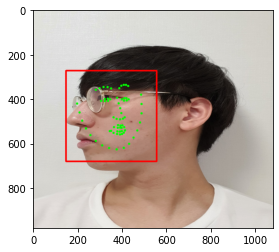

In [54]:
for mark in marks:
    cv2.circle(cp_side, tuple(mark), 5, (0,255,0), -1) # -1은 도형의 채우기 여부
plt.imshow(cp_side)
plt.show()

사전에 학습된 landmark 모델도 제 기능을 하지 못하고 있습니다

#### 풀어야할 숙제
- 해당 문제는 새로운 모델을 만들거나 더 좋은 모델을 찾아서 landmark모델을 적용하여 수염의 위치를 지정하는 것이 좋다고 생각합니다

### 멀리서 촬영해도 될까?

기존의 사진은 얼굴이 사진의 대부분을 차지할 정도로 크게 확대된 상태의 사진이었습니다.  
이번에는 얼굴을 멀리서 찍은 사진으로 멀리서 찍으면서 포함되는 다양한 물건들을 뚫고 제대로 얼굴을 탐지할 수 있을지 알아보겠습니다.

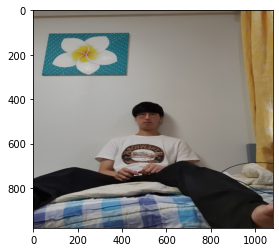

In [55]:
far = cv2.imread("./Data/far_face.jpg")
far = cv2.cvtColor(far, cv2.COLOR_BGR2RGB)
far = cv2.resize(far, (1080, 980))
cp_far = far.copy()
plt.imshow(cp_far)
plt.show()

#### HOG 활용 얼굴 탐지

In [56]:
try:
    dlib_rects = detector_hog(cp_far)
    left = dlib_rects[0].left()
    top = dlib_rects[0].top()
    right = dlib_rects[0].right()
    bottom = dlib_rects[0].bottom()

    cv2.rectangle(cp_far, (left, top), (right, bottom), (255,0,0), 5,
                  lineType = cv2.LINE_AA)
    plt.imshow(cp_far)
    plt.show()
except IndexError:
    print("발견된 얼굴이 없습니다.")

발견된 얼굴이 없습니다.


기존 방법인 HOG 기법을 이용한 얼굴 탐지는 제 기능을 하지 못하고 있습니다.

#### CNN 활용 얼굴 탐지

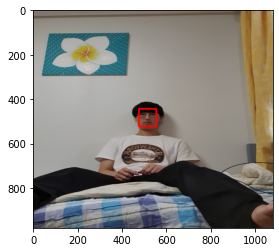

In [57]:
detector_cnn = dlib.cnn_face_detection_model_v1("./Model/mmod_human_face_detector.dat")

try:
    dlib_rects = detector_cnn(cp_far)
    left = dlib_rects[0].rect.left()
    top = dlib_rects[0].rect.top()
    right = dlib_rects[0].rect.right()
    bottom = dlib_rects[0].rect.bottom()

    cv2.rectangle(cp_far, (left, top), (right, bottom), (255,0,0), 5,
                  lineType = cv2.LINE_AA)
    plt.imshow(cp_far)
    plt.show()
except IndexError:
    print("발견된 얼굴이 없습니다.")

하지만 사전 학습되어진 CNN모델은 얼굴의 위치를 제대로 탐지하여 사각형으로 표시해주었습니다.

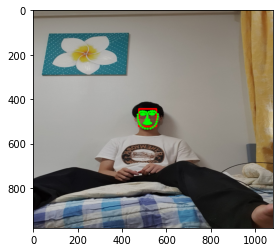

In [58]:
list_landmarks = []
points = landmark_predictor(cp_far, dlib_rects[0].rect)
list_points = list(map(lambda p : (p.x, p.y), points.parts()))

for point in list_points:
    cv2.circle(cp_far, point, 5, (0,255,0), -1) # -1은 도형의 채우기 여부
plt.imshow(cp_far)
plt.show()

얼굴이 탐지된 사각형을 기준으로 landmark가 아주 잘 생성되었습니다.  
하지만 멀리서 찍은 사진의 특성상 너무 작게 보여서 약간 보기가 불편합니다.

In [59]:
rect_width = dlib_rects[0].rect.width()
rect_height = dlib_rects[0].rect.height()
print(f"너비 : {rect_width}\n높이 : {rect_height}")

너비 : 80
높이 : 80


스티커의 크기를 얼굴 탐지 사각형의 높이와 너비에 맞추기 위해서 사각형의 높이와 너비를 가져옵니다.

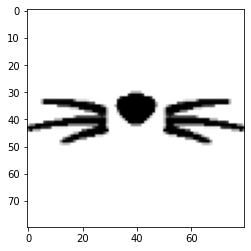

In [60]:
meow = cv2.resize(meow, (rect_height, rect_width)) # (세로, 가로)
plt.imshow(meow)

스티커의 크기는 얼굴 탐지 결과 나온 사각형의 크기만큼 resize 합니다.

444 476


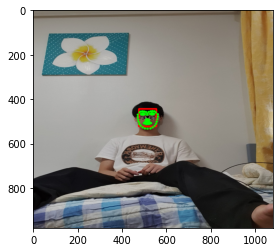

In [61]:
point_x = top 
point_y = left 
print(point_x, point_y)

sticker_image = cp_far.copy()
area = sticker_image[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]]
# np.where(condtion, True, False)
sticker_image[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]] = np.where(meow==255, area, meow)
plt.imshow(sticker_image)
plt.show()

스티커의 위치를 얼굴 탐지로 나온 사각형의 위치와 동일한 위치에 그려넣습니다.

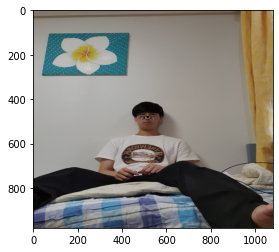

In [62]:
area = far[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]]
# np.where(condtion, True, False)
far[point_x:point_x + meow.shape[0],point_y:point_y + meow.shape[1]] = np.where(meow==255, area, meow)
plt.imshow(far)
plt.show()

원본 이미지에 스티커를 붙힌 형태를 출력합니다.

## 6. 회고

1. 기존 matplotlib의 좌표계는 영점이 좌측하단으로 보기가 편했지만 opencv 좌표계에서는 영점이 좌측상단이었기에 새롭게 적응을 해야 했습니다.
2. 이미지 배열에서 원하는 부분을 스티커로 바꾸는 방법은 처음에는 두 배열의 shape가 동일하지 않다는 오류를 해결하는데 시간을 보냈습니다.
3. 스티커를 적절한 위치에 놓기 위해서 point_x, point_y의 위치를 계속해서 바꾸어 봤으며 결과적으로는 landmark를 기준으로 스티커를 붙이기로 하였습니다.
4. 새로운 문제를 해결하기 부분에서 얼굴의 측면의 경우 CNN 탐지 모델을 잘 작동하였지만 CNN landmark 모델을 제대로 작동하지 않아서 측면에 스티커를 붙일 위치를 찾지 못하였고, 측면으로 보일 때 수염 또한 자연스럽게 측면 수염을 보여주어야 하는데 그렇게 까지 만들기에는 어렵다고 판단하여 진행하지 못하였습니다. 좀 더 열심히 했더라면 측면에서도 적용되는 landmark 모델을 찾을 수 있었을 텐데 해결하지 못한 것이 아쉽습니다.
5. 멀리서 찍은 얼굴의 경우 생각보다 잘찾고 효과가 좋았기에 스티커의 크기를 얼굴 탐지에 사용된 사각형의 크기에 맞추는 것이 좋다고 생각하여 진행하였더니 적절하게 나온걸로 보입니다.